In [3]:
# -*- coding: utf-8 -*-
"""
Document Header here...
"""
from collections import defaultdict
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import pprint
import re
import seaborn as sns

%matplotlib inline

df = pd.read_csv('titanic-data.csv')
print(df.columns)

Index([u'PassengerId', u'Survived', u'Pclass', u'Name', u'Sex', u'Age',
       u'SibSp', u'Parch', u'Ticket', u'Fare', u'Cabin', u'Embarked'],
      dtype='object')


In [4]:
df.rename(columns={'PassengerId': 'passenger_id', 
                   'Pclass': 'p_class', 
                   'Survived': 'survived', 
                   'Name': 'name',
                   'Sex': 'sex', 
                   'Age': 'age', 
                   'SibSp': 'sib_sp', 
                   'Parch': 'par_ch', 
                   'Ticket': 'ticket',
                   'Fare': 'fare', 
                   'Cabin': 'cabin',
                   'Embarked': 'embarked'},
          inplace=True)
print(df.columns)

Index([u'passenger_id', u'survived', u'p_class', u'name', u'sex', u'age',
       u'sib_sp', u'par_ch', u'ticket', u'fare', u'cabin', u'embarked'],
      dtype='object')


## Modified Features

In [16]:
# Calculate size of family also on the Titanic
df['family_size'] = 1 + df.sib_sp + df.par_ch

# Extract the deck value from the cabin value and create a separate column
deck_re = re.compile(r'[A-G]\d+')
df['cabin_deck'] = np.nan
for i, cabin in df['cabin'].iteritems():
    if deck_re.search(str(cabin)):
        deck = deck_re.search(cabin).group()[0]
        df.loc[i, 'cabin_deck'] = deck
    else:
        continue

# Identify an individual's title and create a separate column
title_re = re.compile(r'\w+\.') 
df['title'] = np.nan
for i, name in df['name'].iteritems():
    if title_re.search(name):
        title = title_re.search(name).group()
        df.loc[i, 'title'] = title
    else:
        continue

print(df.loc[:10, ['cabin_deck', 'title']])
print df.cabin_deck.unique()
print df.title.unique()
print df.columns
df.describe()

   cabin_deck    title
0         NaN      Mr.
1           C     Mrs.
2         NaN    Miss.
3           C     Mrs.
4         NaN      Mr.
5         NaN      Mr.
6           E      Mr.
7         NaN  Master.
8         NaN     Mrs.
9         NaN     Mrs.
10          G    Miss.
[nan 'C' 'E' 'G' 'D' 'A' 'B' 'F']
['Mr.' 'Mrs.' 'Miss.' 'Master.' 'Don.' 'Rev.' 'Dr.' 'Mme.' 'Ms.' 'Major.'
 'Lady.' 'Sir.' 'Mlle.' 'Col.' 'Capt.' 'Countess.' 'Jonkheer.']
Index([u'passenger_id', u'survived', u'p_class', u'name', u'sex', u'age',
       u'sib_sp', u'par_ch', u'ticket', u'fare', u'cabin', u'embarked',
       u'family_size', u'cabin_deck', u'title'],
      dtype='object')


,passenger_id,survived,p_class,age,sib_sp,par_ch,fare,family_size
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208,1.904602
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429,1.613459
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,1.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400,1.000000
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200,1.000000
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000,2.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,11.000000


## Factors predicting survival

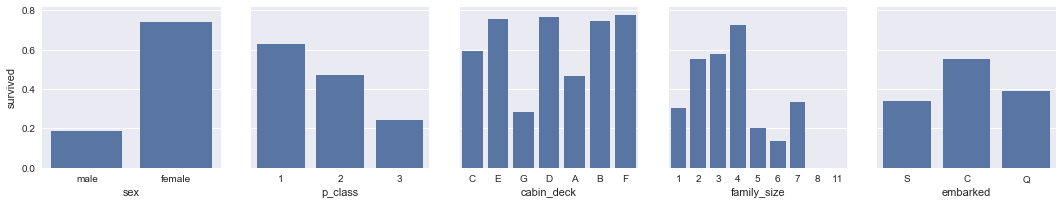

In [23]:
g = sns.PairGrid(data=df, x_vars=['sex', 'p_class', 'cabin_deck', 'family_size', 'embarked'], \
                 y_vars='survived', size=3)
g.map(sns.barplot, ci=None)

Test statistic for two proportions. (more than 5 of each, t-dist approaches normal dist.)  

$$z = \frac{\hat{p}_{female}-\hat{p}_{male}}{4}$$  

$\hat{p}-p$

177
714
891


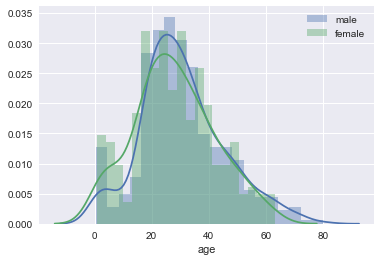

In [43]:
print df.age.isnull().sum()
print df.age.notnull().sum()
print len(df.age)
sns.distplot(df['age'][df.sex == 'male'].dropna(), bins=20,label='male')
sns.distplot(df['age'][df.sex == 'female'].dropna(), bins=20, label='female')
plt.legend()

     age     sex  survived
0   22.0    male         0
1   38.0  female         1
2   26.0  female         1
3   35.0  female         1
4   35.0    male         0
6   54.0    male         0
7    2.0    male         0
8   27.0  female         1
9   14.0  female         1
10   4.0  female         1


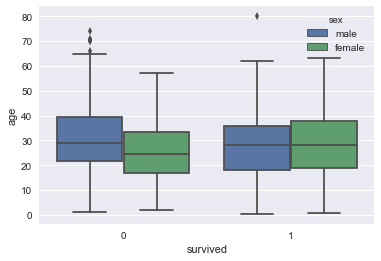

In [55]:
panel = df.loc[df.age.notnull(), ['age', 'sex', 'survived']]
print panel.loc[:10,:]
sns.boxplot(data=panel, x='survived', y='age', hue='sex')

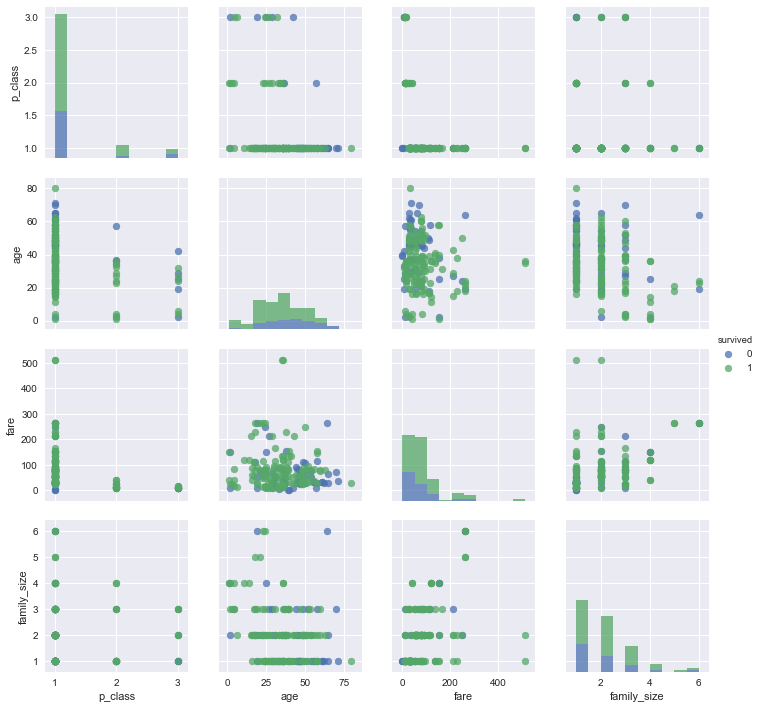

In [51]:




g = sns.PairGrid(data=df.dropna(axis=0), vars=['p_class', 'age', 'fare', 'family_size'], hue='survived')
g = g.map_diag(plt.hist, alpha=0.75)
g = g.map_offdiag(plt.scatter, alpha=0.75)
g = g.add_legend()

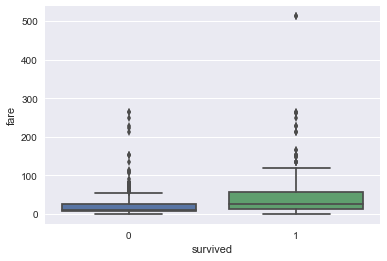

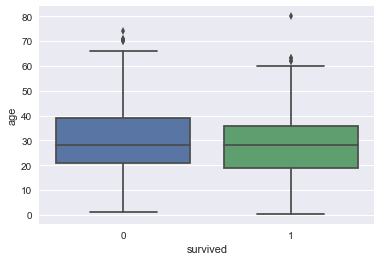

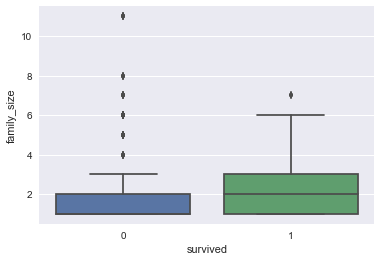

In [54]:
for feature in ('fare', 'age', 'family_size'):
    g = sns.boxplot(data=df, x='survived', y=feature)
    plt.show()

TypeError: bar() takes at least 2 arguments (1 given)

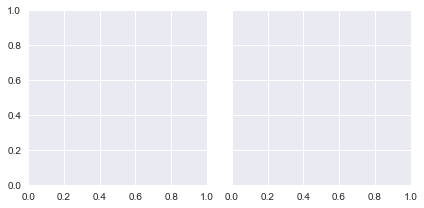

SyntaxError: invalid syntax (<ipython-input-58-804ac7376121>, line 1)

Decision:
* Sex is most drastic between groups
* Is this because of a difference in numbers of male/female?
* Some confounding factor?